# Is H+ATPase limiting?

Jezek et al. (2019) wrote a follow-up OnGuard paper, where they added a constraint-relaxation-recovery mechanism into the model. The justification for this was:

> No physiologically reasonable manipulation of model parameters defining the H+‐ATPase, the K+ and Cl− (anion) channels, their populations at the plasma membrane, or of other transporters participating in guard cell solute accumulation, could bring the model‐predicted stomatal opening substantially closer to the experimentally observed kinetics.

They therefore added a the CRR mechanism into the model which was able to reconcile the kinetics of stomatal conductance experimentally and in the model. 

Despite this, they also say in the discussion:

> Of course, other mechanisms may also accommodate the accelerated stomatal kinetics. For example, there is a substantial body of evidence supporting carbon flow from starch or fructans to sucrose or malate during stomatal opening, and reverse flows during stomatal closure (Dittrich & Raschke, 1977; Outlaw, 2003; Santelia & Lawson,2016; Santelia & Lunn, 2017), especially under low light (Horrer et al., 2016). 

Flutsch et al (2020) investigated the kinetics of stomatal opening in amy3bam1 and aha1 knockouts. The amy3bam1 mutant cannot degrade starch and the aha1 mutant can't pump protons out of the guard cell, which drives K+/Mal/Cl uptake into the guard cell. It also is part of the starch signaling pathway. They found that there was no impact on the H+-ATPase or kinetics of K+/Cl- uptake in the amy3bam1 knockout, suggesting that starch is not degraded to power the H+-ATPase pump, but rather it is a source of osmoticum in the form of glucose. However, the amy3bam1 mutants had slower opening kinetics. 

This would be consistent with a H+-ATPase that is not able to provide osmoticum at a sufficient rate for opening. It is saturated regardless of whether or not starch is available. As our model does not degrade starch, instead meeting all the osmotic requirements of opening using K+/Cl- uptake, we wanted to see what would happen if we added a constraint on the rate of the H+-ATPase. This notebook explores the experimental rate of the H+-ATPase that Flutsch et al (2020) estimated and compares it to the rate in the model that is required for the Guard Cell to open, in order to see whether adding a constraint would affect the model. 

## Setup

In [ ]:
import cobra
import pandas as pd
from matplotlib import pyplot as plt
from mmon_gcm.supermodel import SuperModel

In [ ]:
four_stage_GC_model = cobra.io.sbml.read_sbml_model("../models/4_stage_GC.xml")  # read model

No objective coefficients in model. Unclear what should be optimized


In [ ]:
solution = pd.read_csv("../outputs/model_solutions/blue_unconstrained_starchko.csv", index_col=0)

In [ ]:
parameters_df = pd.read_csv("../inputs/arabidopsis_parameters.csv", index_col=0)

## Calculating H+-ATPase flux in the model in fmoles/gc/h-1

In [ ]:
atpase_flux = solution.loc["PROTON_ATPase_c_gc_2", "fluxes"]
print(f"ATPase flux is {atpase_flux} mmoles m-2 leaf h-1")

ATPase flux is 0.00812887978917 mmoles m-2 leaf h-1


In [ ]:
n_gcs = parameters_df.loc["N_gcs", "Value"]

In [ ]:
flux_per_gc_moles = atpase_flux / n_gcs * 10**-3

In [ ]:
flux_per_gc_fmoles = flux_per_gc_moles * 10**15
flux_per_gc_fmoles_rounded = flux_per_gc_fmoles.round(1)
print(f"Rate of H+-ATPase is {flux_per_gc_fmoles_rounded} fmoles gc-1 h-1")

Rate of H+-ATPase is 14.0 fmoles gc-1 h-1


## Comparing with Flutsch

According to their Supplemental file 1, Flutsch et al say that guard cells can provide 17 fmoles H+ h-1 (0.017 pmoles).

## Comparing with Papanatsiou et al 2019

(From supplementary methods of Papanatsiou et al., 2019:)
>"Between the fully closed and fully open state of the stoma, the osmotic content of an Arabidopsis guard
cell rises by approximately 200 to 300 mM on a cell volume basis (5). Roughly half of this
osmotic content is made up of K+ transported across the plasma membrane and translates to
approximately 70 fmol of K+ per guard cell."  
5 - Engineer, C. B. et al. (2016) ‘CO2 Sensing and CO2 Regulation of Stomatal Conductance: Advances and Open Questions’, Trends in Plant Science. Elsevier Ltd, 21(1), pp. 16–30. doi: 10.1016/j.tplants.2015.08.014. 

But there is nothing in the Engineer paper that references this...

## Comparing with OnGuard

I ran the default model that comes with OnGuard version 3 'RCA5-wt-191120-wt' using the Summer 2022 release of OnGuard. Modifying it by unticking the 'CRR' box. I ran it for 24 hours and exported the results as a csv:

In [ ]:
# import csv and tidy up
onguard_df = pd.read_csv("../inputs/RCA5-wt-191120-wt-001.csv")
onguard_df = onguard_df.set_index("Time /hr")
onguard_df

,Time /s,Time /min,Time /d,Vpm /mV,Vtp /mV,VT /pL,Vac %-age,SA /um,TP /atm,Unnamed: 10,...,VPD/KPa,Unnamed: 140,CRR Value,CRR Recovery,Unnamed: 143,Ciso(0) /mM,'Mott' (*1000),Ciso' /mM,Osm[Cyt] /mM,Unnamed: 148
Time /hr,,,,,,,,,,,,,,,,,,,,,
0.00000,0.0,0.00000,0.00000,-62.1,-35.5,0.381,79.172,1.629,4.303,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.1003,5.73262,28.8329,204.713,NaN
0.00639,23.0,0.38342,0.00027,-62.9,-35.5,0.381,79.162,1.629,4.303,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.0992,5.73783,28.8370,204.752,NaN
0.01306,47.0,0.78353,0.00054,-63.7,-35.4,0.381,79.161,1.629,4.303,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.0991,5.73811,28.8372,204.793,NaN
0.01881,67.7,1.12838,0.00078,-64.3,-35.4,0.381,79.164,1.629,4.303,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.0990,5.73851,28.8375,204.829,NaN
0.02486,89.5,1.49185,0.00104,-64.9,-35.4,0.381,79.168,1.629,4.303,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.0990,5.73911,28.8381,204.867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.97191,86298.9,1438.31476,0.99883,-59.9,-36.4,0.380,79.641,1.609,4.287,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.1004,5.66717,28.7675,204.079,NaN
23.97842,86322.3,1438.70519,0.99910,-59.9,-36.4,0.380,79.642,1.609,4.287,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.1004,5.66763,28.7680,204.084,NaN
23.98431,86343.5,1439.05839,0.99935,-60.0,-36.4,0.380,79.642,1.609,4.287,NaN,...,-0.943,NaN,1,2.630280e-25,NaN,23.1004,5.66814,28.7685,204.089,NaN


Where did their original kinetics for the H+-ATPase come from?

From Hills et al (2012):

> H+-ATPase: The parameters are fully constrained by experimental analysis of the Vicia guard cell H+-ATPase (Blatt 1987a; Blatt 1988a; Blatt and Clint 1989; Clint and Blatt 1989) and equivalent analysis of the Chara H+-ATPase (Blatt et al. 1990a), the latter providing expansion 
to a 4-state carrier cycle to describe its pH dependence explicitly. The model incorporates [Ca2+]i sensitivity as an inhibitory ligand (Ki, 400 nM and nh, 3 to give >90% inhibition at 1 μM [Ca2+]i; see Kinoshita, et al. (1995) and light as a stimulatory ligand [K1/2, 50 μmol m-2 s-1 and nh, 1, 20-fold enhancement over dark activity; see Goh, et al. (1995) and Kinoshita and Shimazaki (Kinoshita and Shimazaki 1999)].


> 4-State H+-ATPase [3000000 units] (4-State 'Slayman' Pump)
#'H' Stoichiometry = +1; binds at 4->1 (in) and 3->2 (ex);
K12 = 2000, K23 = 50000, K34 = 500, K41 = 2e+09,
K21 = 100, K32 = 1e+08, K43 = 10,
 K14 = 200;
Light-Sensitive: Yes: L1⁄2 = 50 μEinsteins, Fmin = 5%
Ligand-Gates:
Ca-inhibited (cytosol): Kd= 2.5e-07, Hill= 3;


## Stomatal aperture sanity check

First, a sanity check on the stomatal aperture:

<Axes: xlabel='Time /hr', ylabel='Aperture (µm)'>

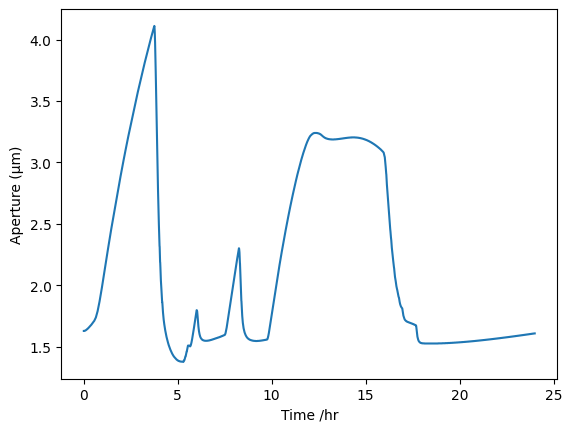

In [ ]:
onguard_df["SA /um"].plot(ylabel="Aperture (µm)")

<Axes: xlabel='Time /hr', ylabel='Aperture (µm)'>

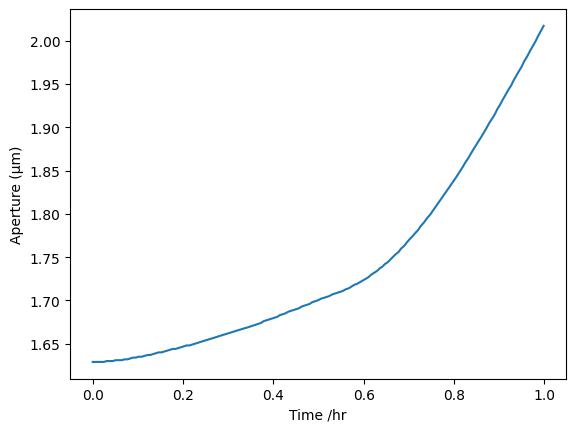

In [ ]:
onguard_df[onguard_df.index < 1]["SA /um"].plot(ylabel="Aperture (µm)")

Our aperture is 1.6-2.75, so pretty similar over half an hour to what they are seeing over one hour

### Osmolarity sanity check

In [ ]:
cyt_df = onguard_df.filter(regex="mM").filter(regex="Cyt")
vac_df = onguard_df.filter(regex="mM").filter(regex="Vac")

In [ ]:
def just_inside_brackets(string_to_be_pruned):
    return string_to_be_pruned.split("]")[0][1:]

In [ ]:
vac_df.columns = [just_inside_brackets(col) + " mM" for col in vac_df.columns]
cyt_df.columns = [just_inside_brackets(col) + " mM" for col in cyt_df.columns]

In [ ]:
vac_frac = 79.2589 / 100

In [ ]:
total_df = vac_df * vac_frac + cyt_df * (1 - vac_frac)

<Axes: xlabel='Time /hr', ylabel='Total osmolytes'>

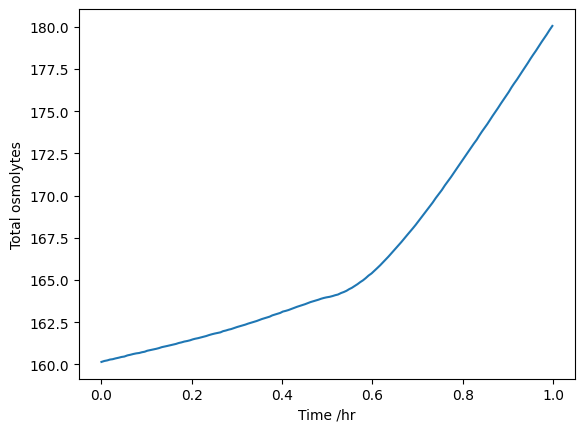

In [ ]:
total_df[onguard_df.index < 1].sum(axis=1).plot(ylabel="Total osmolytes")

Our osmolarities go from 178mM to 215mM for the same aperture range, so there's something not quite right somewhere maybe...

### H$^+$-ATPase flux

Now, let's see what the H+-ATPase flux is doing:

<Axes: xlabel='Time /hr'>

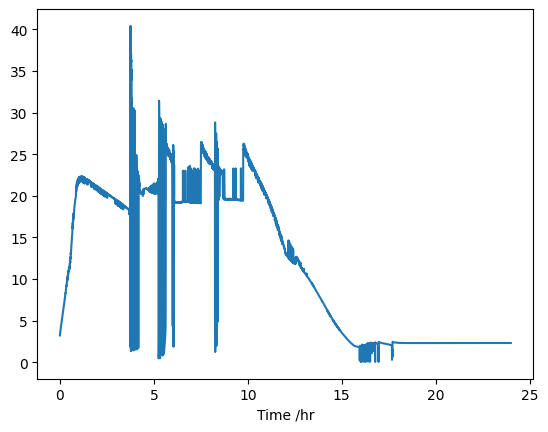

In [ ]:
# get the flux of the H+-ATPase in units of fmoles/h
atpase_h = onguard_df["HATP[H]"] * 3600
atpase_h.plot()

The flux through the H+-ATPASe increases over the first hour or so, but we are only interested in the first half an hour ish:

In [ ]:
from scipy import stats

linreg = stats.linregress(x=onguard_df[onguard_df.index < 0.5].index, y=atpase_h[onguard_df.index < 0.5])

Text(0, 0.5, 'H+-ATPase flux (fmol/h)')

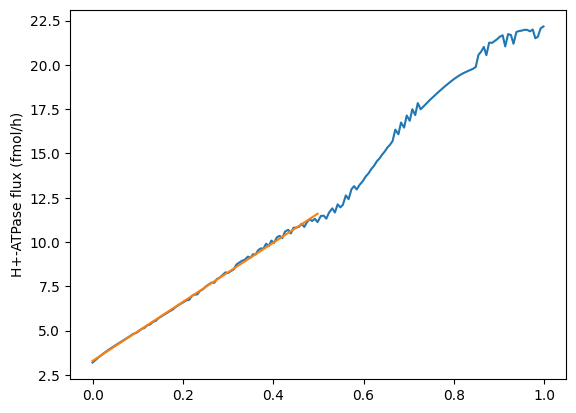

In [ ]:
plt.plot(onguard_df[onguard_df.index < 1].index, atpase_h[onguard_df.index < 1])
plt.plot(onguard_df[onguard_df.index < 0.5].index,
         (onguard_df[onguard_df.index < 0.5].index) * linreg.slope + linreg.intercept)
plt.ylabel("H+-ATPase flux (fmol/h)")

As the increase in flux through the H+-ATPase looks pretty linear from 0 to 0.5 hours, we can take the average over this time period and use it as our constraint

In [ ]:
atpase_h[onguard_df.index < 0.5].mean()

7.499933868292683

## Conclusions

So even though the Flutsch value is higher (17 fmoles/h), it looks like this value from the OnGuard model might be a good value to use as our constraint, as it will about half the H+-ATPase rate for us (7.5 fmoles/h vs 13.9 fmoles/h).